In [1]:
import maintsim
import random
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
maintsim.Machine.maintain.__doc__

'\n        Process for scheduling maintenance by generating maintenance resource\n        requests.\n        '

In [3]:
sys = maintsim.System(process_times=[3,4],
                      buffer_sizes=5,
                      planned_failures=[(0,20,40)])
sys.simulate(warmup_time=100, sim_time=100)

Simulation complete in 0.47s

  Units produced:      20
  System availability: 80.00%



In [4]:
sys.draw()

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

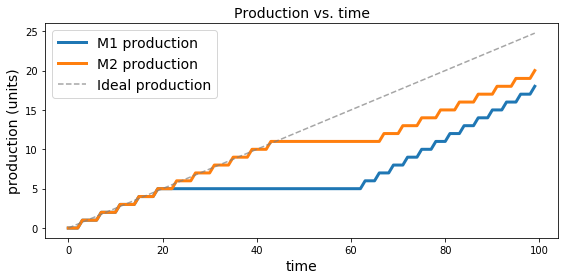

In [26]:
plt.figure(figsize=(8,4))
prod = sys.production_data[sys.production_data['time'] >= 0]
plt.plot(prod['time'], prod['M0 production'], label='M1 production', lw=3)
plt.plot(prod['time'], prod['M1 production'], label='M2 production', lw=3)
plt.plot(prod['time'], prod['time']/4, '--', color='gray', alpha=0.7,
         label='Ideal production')
plt.title('Production vs. time', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.ylabel('production (units)', fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('/Users/mlh6/Work/Proposal/Figures/ppl.eps', format='eps')
plt.show()

In [65]:
sys = maintsim.System(process_times=[3, 5, 4],
                      buffer_sizes=10,
                      failure_mode='degradation',
                      failure_params=[0.45]*3,
                      maintenance_policy='CBM',
                      maintenance_params={'CBM threshold':[10,10,10]},
                      repair_params={'CM':stats.randint(10,50),
                                     'CBM':stats.randint(15,55)},
                      # repair_params={'CM':{'uniform':{'low':10,'high':20)},
                      #                'PM':{'uniform':{'low':5, 'high':10}}},
                      maintenance_capacity=1, debug=True)

In [66]:
sys.simulate(sim_time=100)

0 [] [] []
1 [] [] []
2 [] [] []
3 [] [] []
4 [] [] []
5 [] [] []
6 [] [] []
7 [] [] []
8 [] [] []
9 [] [] []
10 [] [] []
11 [] [<PriorityRequest() object at 0x1a14a09860>] []
12 [] [<PriorityRequest() object at 0x1a14a09860>] [<PriorityRequest() object at 0x1a14a09c18>, <PriorityRequest() object at 0x1a14c7bd30>]
13 [] [<PriorityRequest() object at 0x1a14a09860>] [<PriorityRequest() object at 0x1a14a09c18>, <PriorityRequest() object at 0x1a14c7bd30>]
14 [] [<PriorityRequest() object at 0x1a14a09860>] [<PriorityRequest() object at 0x1a14a09c18>, <PriorityRequest() object at 0x1a14c7bd30>]
15 [] [<PriorityRequest() object at 0x1a14a09860>] [<PriorityRequest() object at 0x1a14a09c18>, <PriorityRequest() object at 0x1a14c7bd30>]
16 [] [<PriorityRequest() object at 0x1a14a09860>] [<PriorityRequest() object at 0x1a14a09c18>, <PriorityRequest() object at 0x1a14c7bd30>]
17 [] [<PriorityRequest() object at 0x1a14a09860>] [<PriorityRequest() object at 0x1a14a09c18>, <PriorityRequest() object at

In [67]:
while (not sys.repairman.put_queue) and (not sys.repairman.get_queue):
    sys.simulate(sim_time=100, verbose=False)
print(sys.repairman.put_queue)
print(sys.repairman.get_queue)

[<PriorityRequest() object at 0x1a14cc36d8>, <PriorityRequest() object at 0x1a14cc5cc0>]
[]


In [70]:
dir(sys.repairman.put_queue[0])

['__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_desc',
 '_value',
 'callbacks',
 'cancel',
 'defused',
 'env',
 'fail',
 'key',
 'ok',
 'preempt',
 'priority',
 'proc',
 'processed',
 'resource',
 'succeed',
 'time',
 'trigger',
 'triggered',
 'usage_since',
 'value']

In [83]:
sys.repairman.put_queue[0]

<PriorityRequest() object at 0x1a14cc36d8>

In [62]:
sys.repairman.put_queue

[]

In [14]:
sys.machine_data[['M{} health'.format(m) for m in range(3)]].ffill()[40:60]

,M0 health,M1 health,M2 health
40,9.0,10.0,10.0
41,9.0,10.0,10.0
42,9.0,10.0,10.0
43,9.0,10.0,10.0
44,10.0,10.0,10.0
45,10.0,10.0,10.0
46,10.0,10.0,10.0
47,10.0,10.0,10.0
48,10.0,10.0,0.0
49,10.0,0.0,0.0


In [10]:
sys.env.now

22

In [18]:
sys = maintsim.System(process_times=[3, 4],
                      buffer_sizes=10,
                      failure_mode='degradation',
                      failure_params=[0.25]*2,
                      maintenance_policy='CBM',
                      maintenance_params={'CBM threshold':[7,6]},
                      repair_params={'CM':stats.randint(10,20),
                                     'CBM':stats.randint(20,25)},
                      # repair_params={'CM':{'uniform':{'low':10,'high':20)},
                      #                'PM':{'uniform':{'low':5, 'high':10}}},
                      maintenance_capacity=1,
                      debug=0)

In [25]:
sys.simulate(sim_time=100)

M1 CBM requested at t=24
M1 requesting maintenance at t=24
M1 stopped production at t=24
M1 starting matinenance at t=24
degradation interrupted at t=24
M0 CBM requested at t=36
M0 requesting maintenance at t=36
M1 resumed production at t=47
M0 stopped production at t=47
M0 starting matinenance at t=47
degradation interrupted at t=47
M0 resumed production at t=68
M1 CBM requested at t=75
M1 requesting maintenance at t=76
M1 stopped production at t=76
M1 starting matinenance at t=76
degradation interrupted at t=76
M1 resumed production at t=100
Simulation complete in 0.18s

  Units produced:      12
  System availability: 66.00%



In [6]:
sys.env.step()
print(sys.repairman.users, sys.repairman.put_queue)

[<PriorityRequest() object at 0x1a235f27f0>] [<PriorityRequest() object at 0x1a23606198>, <PriorityRequest() object at 0x1a23606c50>, <PriorityRequest() object at 0x1a2360e7b8>]


In [24]:
sys.maintenance_data

,time,machine,type,activity,duration
0,25,0,CBM,failure,NA
1,49,0,CBM,repair,24
2,44,1,CM,failure,NA
3,67,1,CM,repair,18
4,68,0,CBM,failure,19
5,91,0,CBM,repair,23


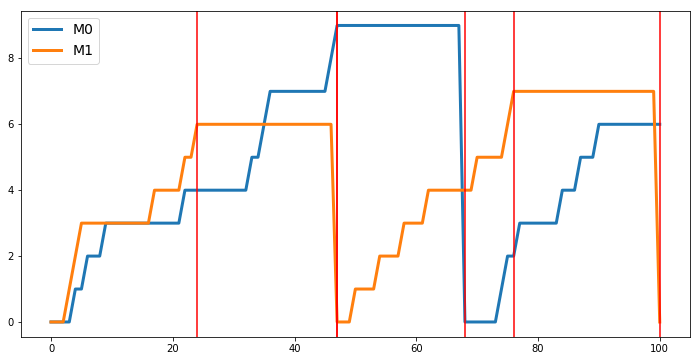

In [26]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data['M0 health'], label='M0', lw=3)
plt.plot(sys.machine_data['M1 health'], label='M1', lw=3)
for t in sys.maintenance_data['time']: plt.axvline(x=t, color='red')
plt.legend(fontsize=14)
plt.show()

In [55]:
sys.machines[1].failed

True

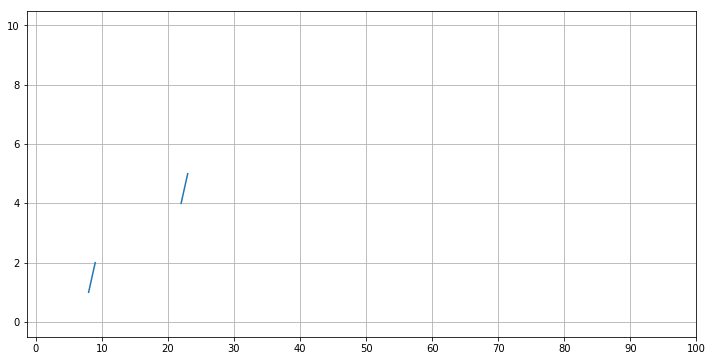

In [11]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data[['M0 health', 'M1 health']])
plt.xticks(np.arange(0,101,10))
colors = ['red', 'orange']
for t in sys.maintenance_data['time'].values:
    #plt.axvline(x=t, c='red')
    pass
plt.grid()
plt.show()

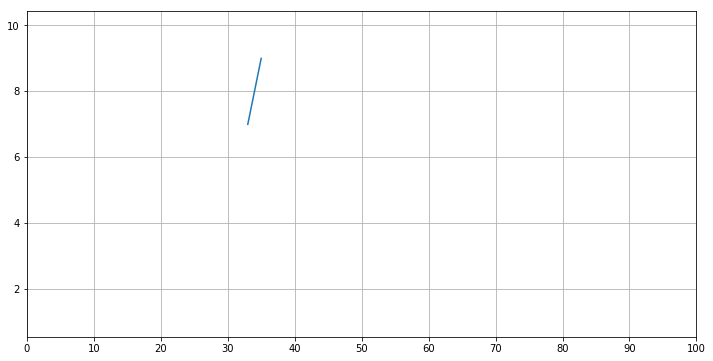

In [5]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data[['M{} health'.format(m) for m in range(1)]])
plt.xticks(np.arange(0,101,10))
plt.grid()
plt.show()

In [38]:
sys.machine_data[['M{} health'.format(m) for m in range(3)]]

,M0 health,M1 health,M2 health
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,1.0,0.0
3,1.0,2.0,0.0
4,1.0,2.0,0.0
5,2.0,2.0,0.0
6,2.0,2.0,0.0
7,2.0,2.0,0.0
8,2.0,2.0,0.0
9,2.0,2.0,0.0
